In [3]:
library(tidyverse)
library(zoo)
library(anytime)
library(scales)
df <- read.csv("Data/Full_Comments_no_body.csv",header = T,stringsAsFactors = F)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




ERROR: Error in library(anytime): there is no package called ‘anytime’


In [5]:
# Formatting Dates
df$Article_Date <- as.Date(df$Article_Date)
df$Comment_Date <- as.Date(df$Comment_Date)
# Trimming 
df$Article_Author <- stringr::str_trim(df$Article_Author)
df$Comment_Poster <- stringr::str_trim(df$Comment_Poster)

### Comment count over time

Warning message:
“Removed 29 row(s) containing missing values (geom_path).”


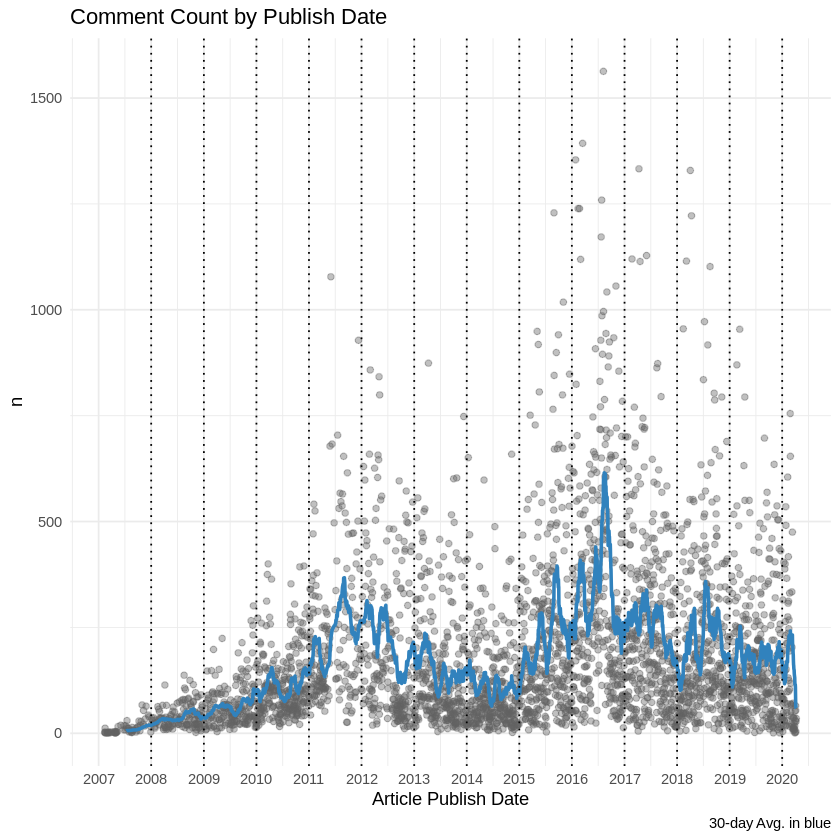

In [7]:
## Comment count over time
comments_time <- df %>% group_by(Article_Date) %>% tally()
comments_time$trailing_30_avg <- zoo::rollmeanr(comments_time$n,k=30,fill=NA)

ggplot(comments_time) +
  geom_point(aes(x=Article_Date, y=n), alpha=0.4, color="#636363") +
  #geom_line(aes(x=Article_Date,y=n), alpha=0.4) +
  #geom_point(aes(x=Article_Date, y=trailing_30_avg), color="#636363") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  geom_line(aes(x=Article_Date, y=trailing_30_avg), color="#3182bd", size=1) +
  geom_vline(xintercept = as.Date("2008-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2009-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2010-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2011-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2012-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2013-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2014-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2015-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2016-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2017-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2018-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2019-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2020-01-01"),linetype=3) +
  theme_minimal() +
  #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  #     panel.background = element_blank(), axis.line = element_line(colour = "black"),
  #     axis.text.x = element_text(angle=90)) +
  #ylab("Comment Count") + 
  xlab ("Article Publish Date") +
  labs(title="Comment Count by Publish Date",caption = "30-day Avg. in blue")

### Article count over time

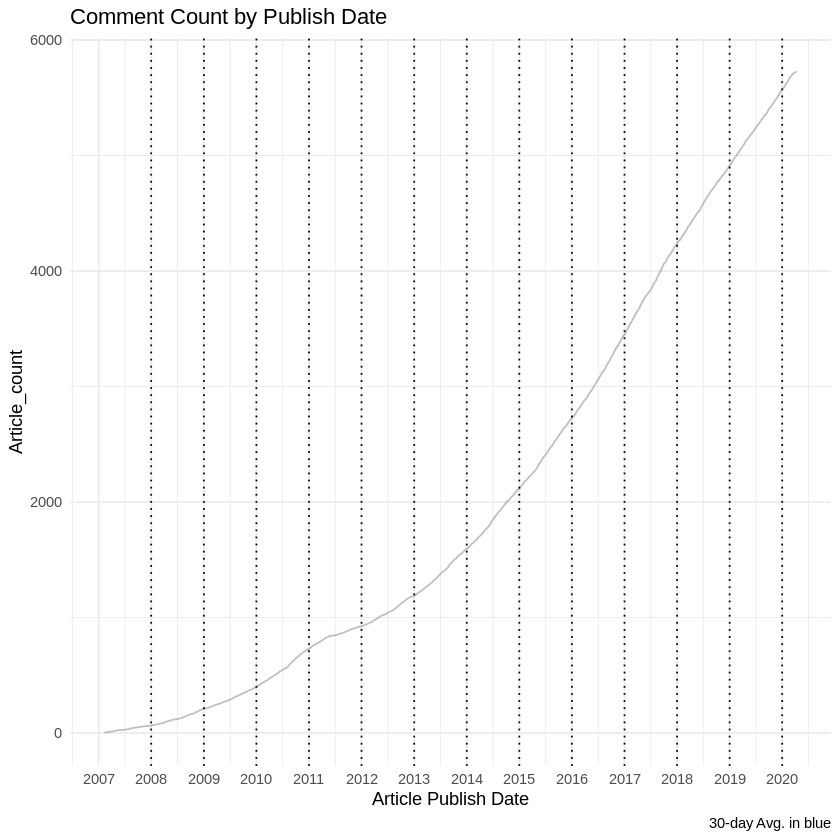

In [8]:
articles_time <- df %>% 
  select(Article_Title,Article_Date) %>% 
  unique() %>%
  arrange(Article_Date) %>% 
  mutate(Article_count=row_number())
#comments_time$trailing_30_avg <- zoo::rollmeanr(comments_time$n,k=30,fill=NA)

ggplot(articles_time) +
  geom_line(aes(x=Article_Date, y=Article_count), alpha=0.4, color="#636363") +
  #geom_line(aes(x=Article_Date,y=n), alpha=0.4) +
  #geom_point(aes(x=Article_Date, y=trailing_30_avg), color="#636363") +
  scale_x_date(date_breaks = "1 year", date_labels = "%Y") +
  #geom_line(aes(x=Article_Date, y=trailing_30_avg), color="#3182bd", size=1) +
  geom_vline(xintercept = as.Date("2008-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2009-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2010-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2011-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2012-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2013-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2014-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2015-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2016-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2017-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2018-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2019-01-01"),linetype=3) +
  geom_vline(xintercept = as.Date("2020-01-01"),linetype=3) +
  theme_minimal() +
  #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  #     panel.background = element_blank(), axis.line = element_line(colour = "black"),
  #     axis.text.x = element_text(angle=90)) +
  #ylab("Comment Count") + 
  xlab ("Article Publish Date") +
  labs(title="Comment Count by Publish Date",caption = "30-day Avg. in blue")


In [9]:
df$Comment_Poster %>% unique() %>% length()

[1] 4602

In [15]:
comment_count <- df %>% group_by(Article_Title, Article_Date) %>% tally()
names(comment_count) <- c("Article_Title","Article_Date","Comment_Count")
head(comment_count)

Article_Title,Article_Date,Comment_Count
<chr>,<date>,<int>
'Family Match' Game Time Thread: Juventus A vs. Juventus B,2012-08-16,97
'Last Chance CL Saloon': Juventus v. Bayern,2009-12-07,255
'Win One For The Gipper',2009-01-24,147
'Ze Germán Is Coming!',2010-02-22,24
‘Letter to My Younger Self’: How Gianluigi Buffon overcame depression,2019-10-16,12
"""Bianconero e il calcio quello veeeeero""",2009-04-27,25


In [17]:
summary(comment_count$Comment_Count)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1      35      72     110     143    1078 

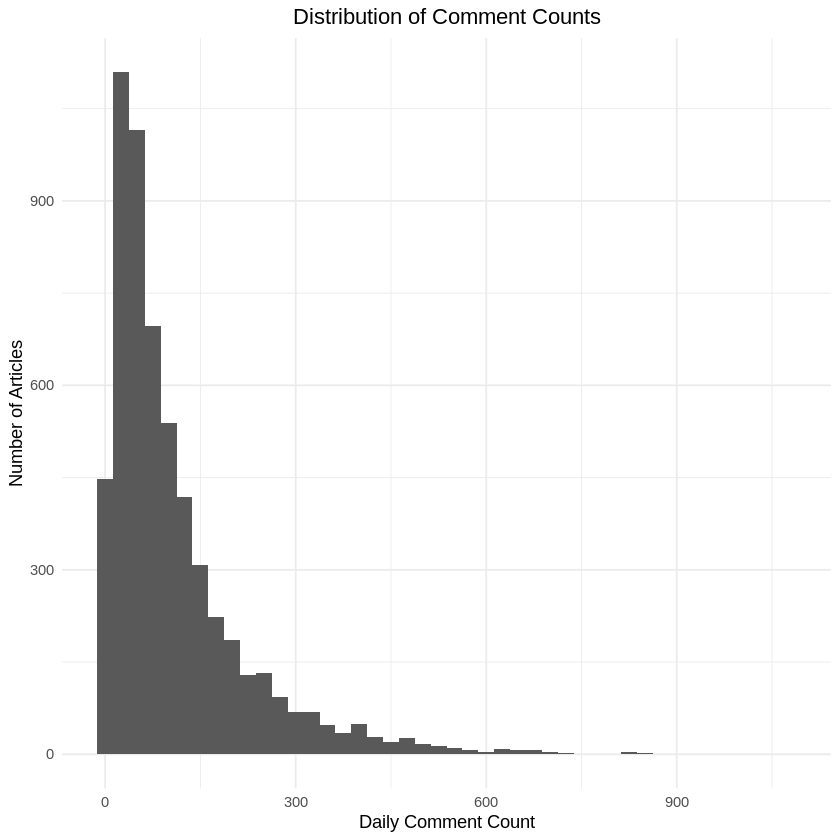

In [27]:
ggplot(comment_count, aes(x=Comment_Count)) + 
    geom_histogram(binwidth = 25) + 
    theme_minimal() + 
    xlab("Daily Comment Count") + ylab("Number of Articles") +
    ggtitle("Distribution of Comment Counts") +
    theme(plot.title = element_text(hjust = 0.5))

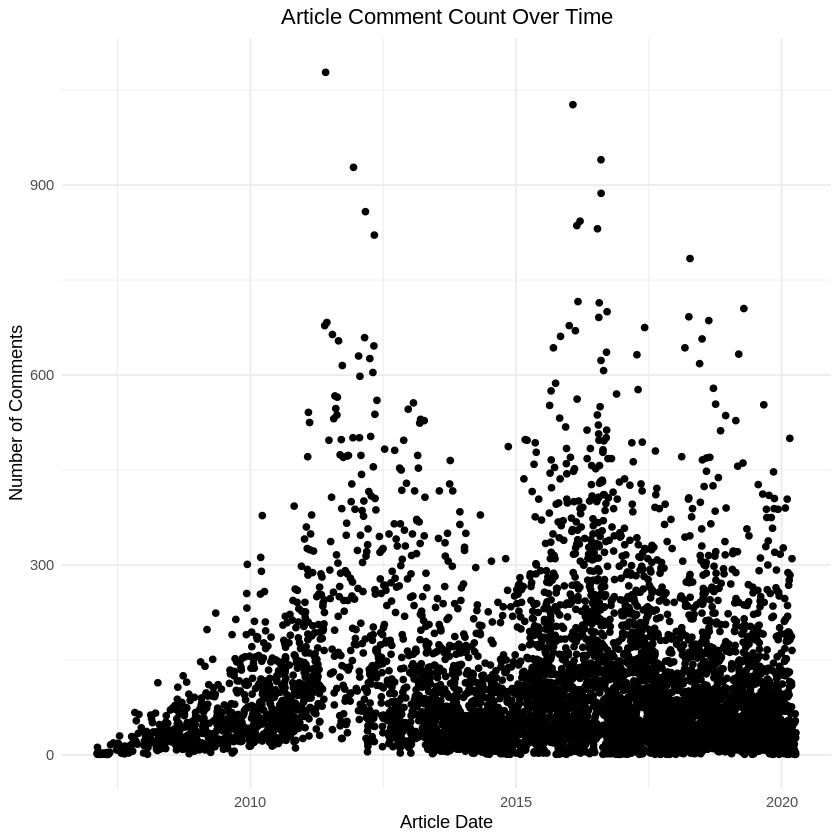

In [28]:
ggplot(comment_count, aes(x=Article_Date,y=Comment_Count)) + 
    geom_point() + 
    theme_minimal() +
    xlab("Article Date") + ylab("Number of Comments") +
    ggtitle("Article Comment Count Over Time") +
    theme(plot.title = element_text(hjust = 0.5))

In [10]:
glimpse(df)

Rows: 630,292
Columns: 9
$ X              <int> 27814, 27815, 27788, 27789, 27790, 27791, 27792, 27793…
$ Article_Title  <chr> "An Interview with Moggi's Lawyer", "An Interview with…
$ Article_Author <chr> "The Offside Juventus", "The Offside Juventus", "The O…
$ Article_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Title  <chr> "", "", "", "", "", "", "", "", "", "", "", "", "", ""…
$ Comment_Poster <chr> "Juve 1897", "Juve 1897", "alessio", "Mohammed", "Moha…
$ Comment_Date   <date> 2010-04-01, 2010-04-01, 2010-04-01, 2010-04-01, 2010-…
$ Comment_Time   <chr> " 10:40 PM", " 11:17 PM", " 11:52 AM", " 12:21 PM", " …
$ Comment_Recs   <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
